In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("../1_datasets/final_datasets/covid_pm25_sdi_final.csv")
df.head()

,Unnamed: 0,Country,COVID Deaths Val (Rate),upper,lower,SDI mean value,Avg_PM25_2010_2019
0,0,Spain,10.472981,11.087217,9.876074,0.766506,10.995
1,1,Indonesia,10.159491,20.825411,3.318329,0.651927,19.610
2,2,Mexico,57.019696,70.946973,44.181729,0.660119,21.268
3,3,Russian Federation,18.195048,22.069367,14.809403,0.806011,9.857
4,4,Chile,17.427140,18.275500,16.582775,0.769214,22.628


In [37]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               25 non-null     int64  
 1   Country                  25 non-null     object 
 2   COVID Deaths Val (Rate)  25 non-null     float64
 3   upper                    25 non-null     float64
 4   lower                    25 non-null     float64
 5   SDI mean value           25 non-null     float64
 6   Avg_PM25_2010_2019       25 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.5+ KB
None
       Unnamed: 0  COVID Deaths Val (Rate)      upper      lower  \
count   25.000000                25.000000  25.000000  25.000000   
mean    12.000000                20.055505  23.924876  16.963909   
std      7.359801                18.461147  22.259885  15.971832   
min      0.000000                 0.189647   0.211685   0.069869   
25%  

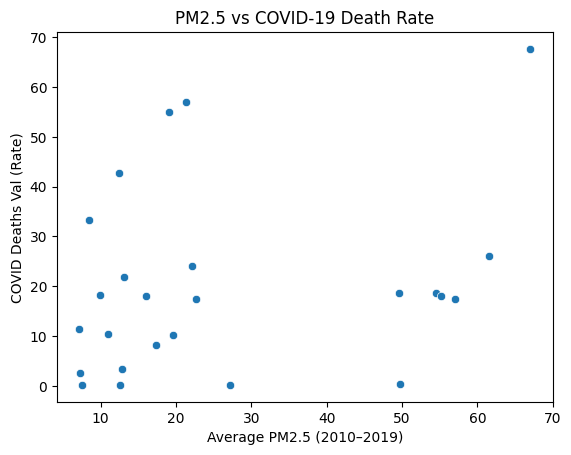

In [38]:
sns.scatterplot(data=df, x="Avg_PM25_2010_2019", y="COVID Deaths Val (Rate)")
plt.title("PM2.5 vs COVID-19 Death Rate")
plt.xlabel("Average PM2.5 (2010–2019)")
plt.ylabel("COVID Deaths Val (Rate)")
plt.show()

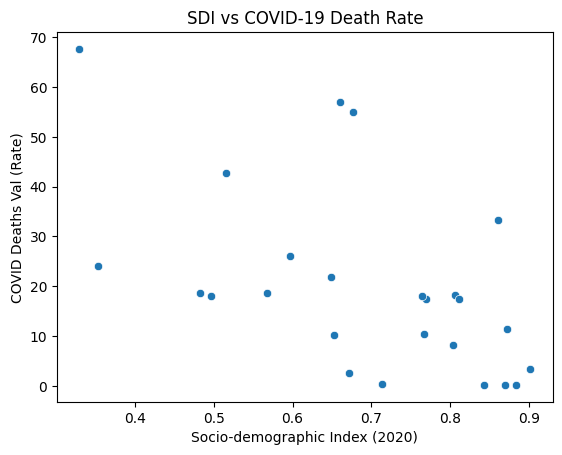

In [39]:
sns.scatterplot(data=df, x="SDI mean value", y="COVID Deaths Val (Rate)")
plt.title("SDI vs COVID-19 Death Rate")
plt.xlabel("Socio-demographic Index (2020)")
plt.ylabel("COVID Deaths Val (Rate)")
plt.show()

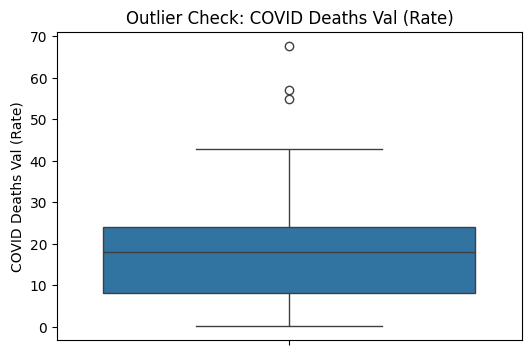

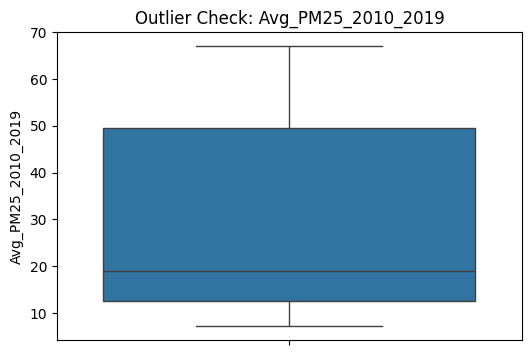

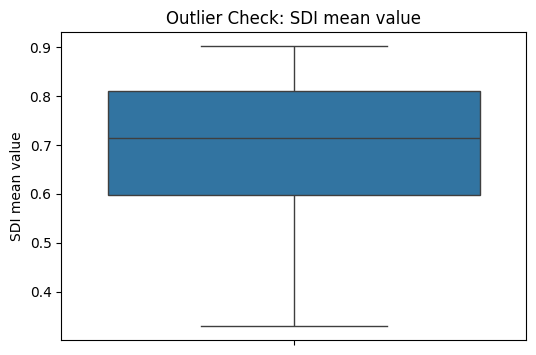

In [43]:
columns_to_plot = ["COVID Deaths Val (Rate)", "Avg_PM25_2010_2019", "SDI mean value"]

for col in columns_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Outlier Check: {col}")
    plt.ylabel(col)
    plt.show()

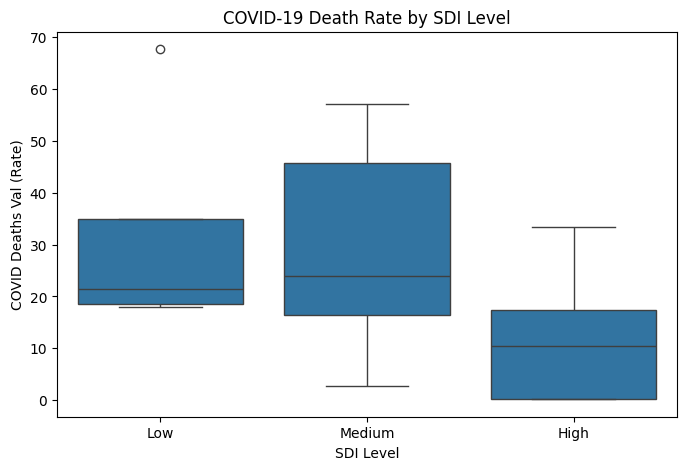

In [42]:
df["SDI mean value"] = pd.to_numeric(df["SDI mean value"], errors="coerce")

df["SDI_Level"] = pd.cut(
    df["SDI mean value"], bins=[0, 0.5, 0.7, 1.0], labels=["Low", "Medium", "High"]
)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="SDI_Level", y="COVID Deaths Val (Rate)")
plt.title("COVID-19 Death Rate by SDI Level")
plt.xlabel("SDI Level")
plt.ylabel("COVID Deaths Val (Rate)")
plt.show()